# Asset Correlation Analysis

Calculate asset correlation (rho) for all countries with both Corporate and Retail Default Rate data since 2009.

This notebook was created using Claude Code and may contain errors. Please do not use the results unless you review and agree to the assumptions in this notebook.

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm

# Display settings - show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

# Load data
df = pd.read_excel('db_eba_pd_lgd_history.xlsx')
print(f"Loaded {len(df)} rows")
print(f"Columns: {df.columns.tolist()}")
print(f"\nUnique Segments: {df['Segment'].unique()}")
print(f"\nUnique Metrics: {df['Metric'].unique()}")

Loaded 31612 rows
Columns: ['Country', 'Segment', 'Date', 'Snapshot Date', 'Metric', 'Value']

Unique Segments: ['Corporates' 'Corporates - Of Which: Specialised Lending'
 'Corporates - Of Which: SME' 'Retail'
 'Retail - Secured on real estate property'
 'Retail - Qualifying Revolving' 'Retail - Other Retail']

Unique Metrics: ['Default Rate' 'Loss rate' 'PD' 'LGD']


In [2]:
# Only countries with no missing values across all December snapshots are included.
# Corporate and Retail segments are evaluated independently.

In [3]:
# Filter for Default Rate metric and base segments, December snapshots only
df_dr = df[df['Metric'] == 'Default Rate'].copy()
df_dr = df_dr[df_dr['Segment'].isin(['Corporates', 'Retail'])]
df_dr = df_dr[df_dr['Snapshot Date'].dt.month == 12]
df_dr['Snapshot Date'] = df_dr['Snapshot Date'].dt.year

print(f"Filtered to {len(df_dr)} rows with Default Rate for Corporates/Retail (December only)")
print(f"Years: {sorted(df_dr['Snapshot Date'].unique())}")

Filtered to 854 rows with Default Rate for Corporates/Retail (December only)
Years: [np.int32(2009), np.int32(2010), np.int32(2011), np.int32(2012), np.int32(2013), np.int32(2015), np.int32(2016), np.int32(2017), np.int32(2018), np.int32(2019), np.int32(2020), np.int32(2021)]


### Data Overview: Corporate Default Rates by Country

In [4]:
# Corporate Default Rates: Countries as columns, Dates as rows
df_corporate = df_dr[df_dr['Segment'] == 'Corporates'].pivot_table(
    index='Snapshot Date',
    columns='Country',
    values='Value',
    aggfunc='first'
)

df_corporate

Country,Australia,Austria,Belgium,Bulgaria,Canada,China,Croatia,Cyprus,Czech,Denmark,Estonia,Finland,France,Germany,Greece,Hong Kong,Hungary,India,Ireland,Italy,"Korea, Republic Of",Latvia,Lithuania,Luxembourg,Malta,Netherlands,Norway,Poland,Portugal,Romania,Russian Federation,Singapore,Slovakia,Slovenia,Spain,Sweden,Switzerland,United Kingdom,United States
Snapshot Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009,NaN,0.010248,0.010834,0.026466,NaN,NaN,NaN,0.032067,NaN,0.018900,NaN,0.009535,0.011093,0.014208,0.020049,NaN,NaN,NaN,0.077861,0.032402,NaN,0.072073,NaN,0.081303,NaN,0.016111,0.008782,0.053790,0.025984,0.031921,NaN,NaN,NaN,NaN,0.050042,0.006783,NaN,0.014234,NaN
2010,NaN,0.010400,0.011193,0.068682,NaN,NaN,NaN,0.028749,0.022425,0.016901,NaN,0.009248,0.010174,0.011974,0.039325,NaN,0.034257,NaN,0.101424,0.021340,NaN,0.045357,NaN,0.010492,NaN,0.021745,0.009862,0.037973,0.020054,0.060721,NaN,NaN,0.019736,0.047208,0.040420,0.004545,NaN,0.010713,NaN
2011,NaN,0.012147,0.027678,NaN,NaN,NaN,NaN,NaN,0.013958,0.014674,NaN,0.009360,0.008077,0.012350,NaN,NaN,0.027826,NaN,0.168836,0.034744,NaN,NaN,NaN,0.014447,NaN,0.017870,0.010126,0.026078,0.052466,0.082519,NaN,NaN,0.013828,NaN,0.035393,0.001814,NaN,0.025092,NaN
2012,NaN,0.014492,0.019913,NaN,NaN,NaN,NaN,NaN,0.013712,0.018174,NaN,0.006707,0.013655,0.014677,0.113534,NaN,0.057340,NaN,0.169881,0.052125,NaN,NaN,NaN,0.054086,NaN,0.025025,0.013946,0.036428,0.071040,0.048521,NaN,NaN,0.018539,NaN,0.066966,0.003379,NaN,0.019963,NaN
2013,NaN,0.018813,0.017365,0.046562,NaN,NaN,NaN,0.277211,0.018130,0.017020,NaN,0.011242,0.012476,0.016632,0.094244,NaN,0.038656,NaN,0.104624,0.068377,NaN,NaN,NaN,0.073794,NaN,0.037520,0.005198,0.031829,0.059745,0.093363,NaN,NaN,0.024490,0.138533,0.085603,0.003422,NaN,0.023788,NaN
2015,0.006225,0.008779,0.014996,0.049826,0.008987,0.004991,0.066066,0.108564,0.018819,0.010893,0.058241,0.015101,0.005868,0.013389,NaN,0.002776,0.007696,0.011055,0.029183,0.035711,NaN,0.023019,0.036111,0.005992,0.133673,0.023150,0.009504,0.008978,0.117899,0.021289,0.017423,0.006013,0.041416,0.003168,0.052336,0.003034,0.017583,0.007678,0.005210
2016,0.015704,0.007623,0.012347,NaN,0.012736,0.005284,NaN,0.107596,0.013378,0.010854,0.039460,0.014403,0.007211,0.014257,0.076913,0.005630,0.010226,0.012024,0.021852,0.018769,NaN,0.006395,0.021022,0.016650,0.674092,0.015470,0.014524,0.009802,0.058812,0.022484,NaN,0.020733,0.022955,NaN,0.038269,0.002573,0.009523,0.010248,0.009574
2017,0.006224,0.019537,0.007618,NaN,0.004609,NaN,0.070375,NaN,0.007382,0.006624,NaN,0.008842,0.005833,0.010033,NaN,0.004874,0.003866,0.013033,0.019959,0.069034,NaN,0.018434,NaN,0.007838,NaN,0.023225,0.014466,0.011473,0.031153,NaN,NaN,0.012506,0.019758,0.019405,0.031837,0.001767,0.001396,0.012366,0.005699
2018,NaN,0.009515,0.011377,NaN,0.003181,0.002406,NaN,0.006129,0.007590,0.006037,0.003028,NaN,0.008200,0.010110,0.022680,NaN,0.005777,0.005930,0.028393,0.053740,NaN,NaN,NaN,0.004831,NaN,0.017001,0.014683,0.008594,0.027428,NaN,NaN,0.006808,0.021208,0.010554,0.020624,0.001676,0.015677,0.008870,0.002903


### Data Overview: Retail Default Rates by Country

In [5]:
# Retail Default Rates: Countries as columns, Dates as rows
df_retail = df_dr[df_dr['Segment'] == 'Retail'].pivot_table(
    index='Snapshot Date',
    columns='Country',
    values='Value',
    aggfunc='first'
)

df_retail

Country,Australia,Austria,Belgium,Bulgaria,Canada,China,Croatia,Cyprus,Czech,Denmark,Estonia,Finland,France,Germany,Greece,Hong Kong,Hungary,India,Ireland,Italy,"Korea, Republic Of",Latvia,Lithuania,Luxembourg,Malta,Netherlands,Norway,Poland,Portugal,Romania,Russian Federation,Singapore,Slovakia,Slovenia,Spain,Sweden,Switzerland,United Kingdom,United States
Snapshot Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009,NaN,NaN,0.010793,0.036978,NaN,NaN,NaN,NaN,NaN,0.007393,NaN,NaN,0.013197,0.010972,0.043802,NaN,NaN,NaN,0.038819,0.032905,NaN,NaN,NaN,0.013500,NaN,0.006369,0.006500,0.019944,0.021069,0.028463,NaN,NaN,NaN,NaN,0.029031,0.003294,NaN,0.014320,NaN
2010,NaN,NaN,0.012946,0.061926,NaN,NaN,NaN,0.040724,NaN,0.006978,NaN,NaN,0.013986,0.009715,0.051246,NaN,0.038105,NaN,0.202397,0.022429,NaN,NaN,NaN,0.013921,NaN,0.006367,0.004251,0.026961,0.016690,0.059597,NaN,NaN,0.030523,0.037766,0.022462,0.003114,NaN,0.036330,NaN
2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025831,0.009416,NaN,NaN,0.009833,0.009625,NaN,NaN,0.072287,NaN,0.076412,0.022714,NaN,NaN,NaN,0.005109,NaN,0.006877,0.004140,0.021113,0.024531,NaN,NaN,NaN,0.023440,NaN,0.010046,0.001373,NaN,0.016910,NaN
2012,NaN,0.009044,NaN,NaN,NaN,NaN,NaN,NaN,0.021080,0.010770,NaN,0.011328,0.014717,0.010488,0.119590,NaN,0.078033,NaN,0.079276,0.025870,NaN,NaN,NaN,0.007493,NaN,0.007705,0.004326,0.023384,0.036253,0.046618,NaN,NaN,0.016882,NaN,0.045214,0.004038,NaN,0.016147,NaN
2013,NaN,0.010080,0.013474,0.045994,NaN,NaN,NaN,NaN,0.016619,0.007481,NaN,0.007608,0.017338,0.010315,0.106123,NaN,0.082890,NaN,0.074227,0.037009,NaN,NaN,NaN,0.006096,NaN,0.013637,0.005346,0.025568,0.018533,0.053248,NaN,NaN,0.020459,NaN,0.035080,0.003133,NaN,0.013436,NaN
2015,0.005850,0.008139,0.018418,0.011545,0.021687,0.000830,0.034503,0.121618,0.013868,0.006401,0.004040,0.006895,0.014197,0.007091,0.081886,0.000652,0.190662,0.000246,0.022527,0.047840,0.008655,0.014901,0.013695,0.007889,NaN,0.007703,0.003174,0.010481,0.028140,0.092346,0.010909,0.000771,0.014062,0.028813,0.024365,0.002343,0.005945,0.007735,0.022359
2016,0.004603,0.006422,0.009074,0.018619,0.004200,0.001847,0.027198,0.006424,0.010239,0.007086,0.003501,0.008896,0.012388,0.006246,0.112500,0.000743,0.076513,0.002378,0.039017,0.105885,0.000522,0.009269,0.010212,0.004886,0.032490,0.007300,0.003462,0.011131,0.025750,0.082465,0.009861,0.003156,0.011431,0.020960,0.025718,0.001565,0.009677,0.007191,0.015347
2017,0.010822,0.006203,0.010215,0.025702,0.003505,0.000904,0.022813,0.010639,0.009454,0.005359,0.002910,0.035355,0.010887,0.006317,0.109835,0.000515,0.025748,0.009176,0.047568,0.139417,0.000440,0.026419,0.008134,0.004441,0.032209,0.008193,0.003158,0.013513,0.024790,0.031307,0.058779,0.001405,0.010101,0.013153,0.018972,0.001309,0.004791,0.006808,0.009137
2018,0.008145,0.006734,0.009446,0.020476,0.003458,0.000610,0.019975,0.017914,0.007551,0.007015,0.002545,0.014536,0.009034,0.005861,0.093221,0.000408,0.013129,0.005288,0.026100,0.086644,0.000604,0.006463,0.006686,0.004042,0.033186,0.005936,0.003198,0.010682,0.014172,0.064295,0.012913,0.001197,0.008246,0.025365,0.015121,0.001399,0.010648,0.007201,0.008020


In [6]:
# Pivot to get Corporate and Retail as columns
df_pivot = df_dr.pivot_table(
    index=['Country', 'Snapshot Date'],
    columns='Segment',
    values='Value',
    aggfunc='first'
).reset_index()

df_pivot.columns.name = None
df_pivot = df_pivot.rename(columns={'Corporates': 'Corporate_DR', 'Retail': 'Retail_DR'})

In [7]:
# Identify countries with complete data per segment (no missing December values)
dec_dates = df_dr['Snapshot Date'].unique()

# Corporate: pivot and find countries with no NaN
df_corp = df_dr[df_dr['Segment'] == 'Corporates'].pivot_table(
    index='Snapshot Date', columns='Country', values='Value', aggfunc='first')
valid_corporate_countries = df_corp.columns[df_corp.notna().all()].tolist()

# Retail: pivot and find countries with no NaN
df_ret = df_dr[df_dr['Segment'] == 'Retail'].pivot_table(
    index='Snapshot Date', columns='Country', values='Value', aggfunc='first')
valid_retail_countries = df_ret.columns[df_ret.notna().all()].tolist()

print(f"Corporate: {len(valid_corporate_countries)} countries with complete December data")
print(f"Retail: {len(valid_retail_countries)} countries with complete December data")
print(f"Corporate countries: {valid_corporate_countries}")
print(f"Retail countries: {valid_retail_countries}")

Corporate: 15 countries with complete December data
Retail: 13 countries with complete December data
Corporate countries: ['Austria', 'Belgium', 'Denmark', 'France', 'Germany', 'Ireland', 'Italy', 'Luxembourg', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Spain', 'Sweden', 'United Kingdom']
Retail countries: ['Denmark', 'France', 'Germany', 'Ireland', 'Italy', 'Luxembourg', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Spain', 'Sweden', 'United Kingdom']


In [8]:
def calculate_asset_correlation(default_rates):
    """
    Calculate asset correlation (rho) and threshold (k) using the Indirect Moment Approach.
    
    Parameters:
    -----------
    default_rates : array-like
        Time series of observed default rates (in decimal form)
    
    Returns:
    --------
    rho : float
        Estimated asset correlation
    k : float
        Estimated threshold parameter
    """
    default_rates = np.array(default_rates)
    
    # Convert to z-scores via inverse normal
    pd_inverted = norm.ppf(default_rates)
    
    # Sample mean and std
    mu_pd_inv = np.mean(pd_inverted)
    sigma_pd_inv = np.std(pd_inverted, ddof=1)
    
    # Solve for rho
    s2 = sigma_pd_inv**2
    rho = s2 / (1 + s2)
    
    # Solve for k
    k = mu_pd_inv * np.sqrt(1 - rho)
    
    return rho, k

In [9]:
# Calculate asset correlation independently for Corporate and Retail
corp_results = []
for country in valid_corporate_countries:
    dr = df_corp[country].values
    rho, k = calculate_asset_correlation(dr)
    corp_results.append({'Country': country, 'Rho_Corporate': rho, 'K_Corporate': k, 'N_Corporate': len(dr)})

retail_results = []
for country in valid_retail_countries:
    dr = df_ret[country].values
    rho, k = calculate_asset_correlation(dr)
    retail_results.append({'Country': country, 'Rho_Retail': rho, 'K_Retail': k, 'N_Retail': len(dr)})

df_corp_res = pd.DataFrame(corp_results)
df_ret_res = pd.DataFrame(retail_results)
results_df = pd.merge(df_corp_res, df_ret_res, on='Country', how='outer')
print(f"Results: {len(results_df)} countries total")

Results: 15 countries total


In [10]:
# Display results sorted by Country
results_df_sorted = results_df.sort_values('Country')
results_df_sorted.style.format({
    'Rho_Corporate': '{:.4f}',
    'K_Corporate': '{:.4f}',
    'Rho_Retail': '{:.4f}',
    'K_Retail': '{:.4f}'
}, na_rep='-')

,Country,Rho_Corporate,K_Corporate,N_Corporate,Rho_Retail,K_Retail,N_Retail
0,Austria,0.0346,-2.2787,12,-,-,-
1,Belgium,0.0168,-2.1765,12,-,-,-
2,Denmark,0.0345,-2.2696,12,0.0063,-2.4531,12.000000
3,France,0.0113,-2.3625,12,0.0221,-2.2839,12.000000
4,Germany,0.0183,-2.2701,12,0.0085,-2.4100,12.000000
5,Ireland,0.1601,-1.4999,12,0.1587,-1.6093,12.000000
6,Italy,0.1063,-1.8053,12,0.1062,-1.6256,12.000000
7,Luxembourg,0.1691,-1.9869,12,0.0275,-2.4772,12.000000
8,Netherlands,0.0203,-2.0545,12,0.0084,-2.4414,12.000000
9,Norway,0.0158,-2.2493,12,0.0063,-2.6531,12.000000


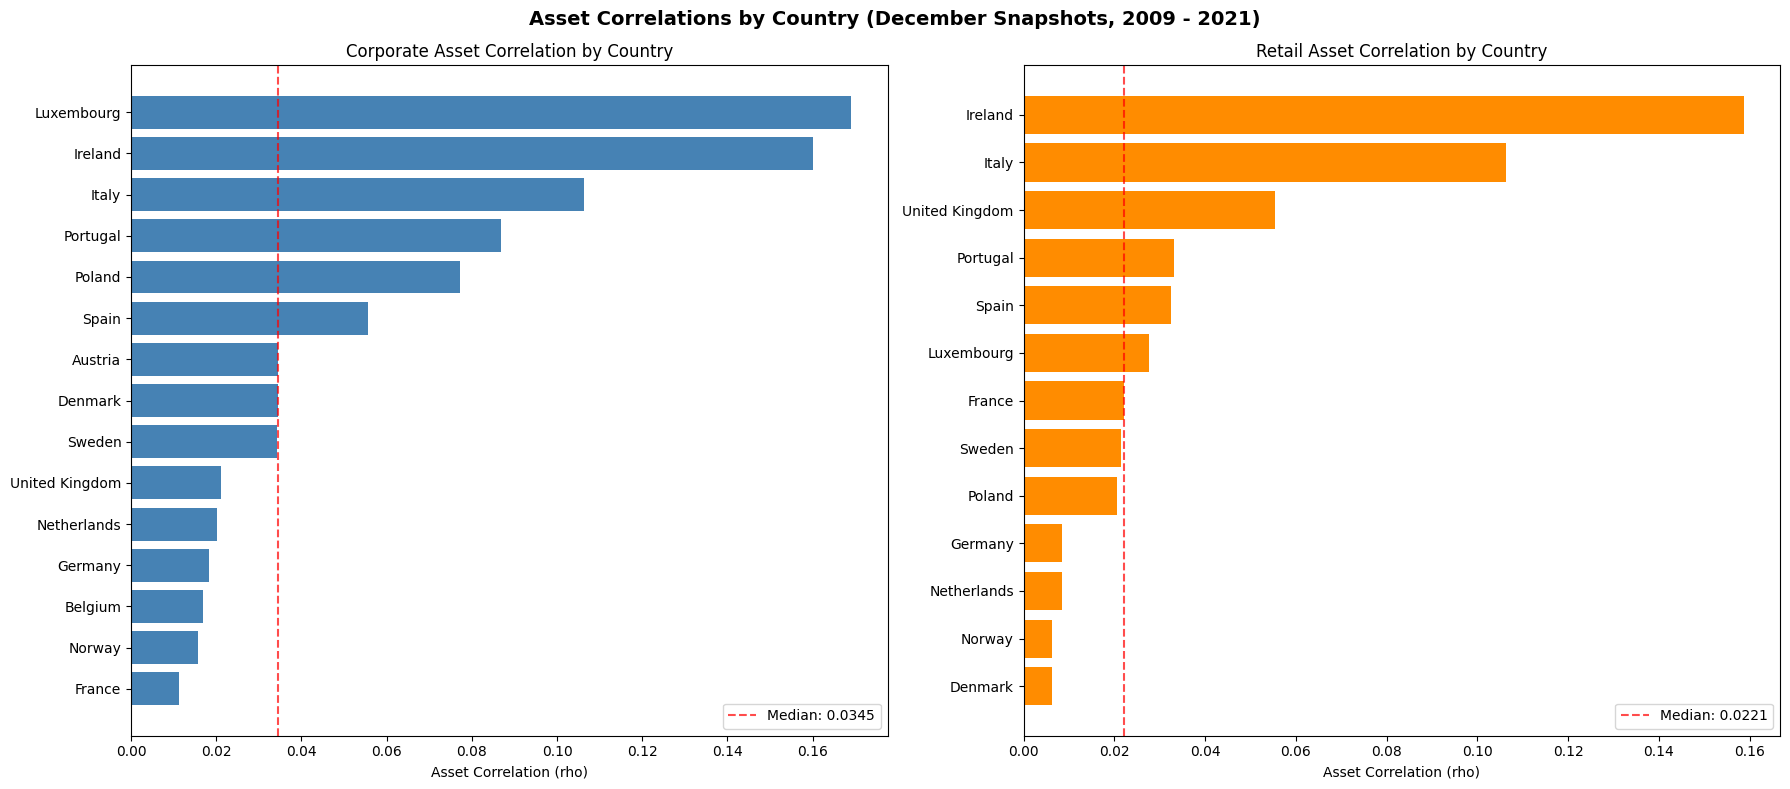

In [11]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Corporate subplot
corp_data = results_df.dropna(subset=["Rho_Corporate"]).sort_values("Rho_Corporate", ascending=True)
ax1.barh(corp_data["Country"], corp_data["Rho_Corporate"], color="steelblue")
ax1.set_xlabel("Asset Correlation (rho)")
ax1.set_title("Corporate Asset Correlation by Country")
ax1.axvline(x=corp_data["Rho_Corporate"].median(), color="red", linestyle="--", alpha=0.7, label=f"Median: {corp_data['Rho_Corporate'].median():.4f}")
ax1.legend()

# Retail subplot
ret_data = results_df.dropna(subset=["Rho_Retail"]).sort_values("Rho_Retail", ascending=True)
ax2.barh(ret_data["Country"], ret_data["Rho_Retail"], color="darkorange")
ax2.set_xlabel("Asset Correlation (rho)")
ax2.set_title("Retail Asset Correlation by Country")
ax2.axvline(x=ret_data["Rho_Retail"].median(), color="red", linestyle="--", alpha=0.7, label=f"Median: {ret_data['Rho_Retail'].median():.4f}")
ax2.legend()

plt.suptitle("Asset Correlations by Country (December Snapshots, 2009 - 2021)", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()